In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
df = pd.read_csv('./Predicting-House-Prices/data.csv')
df.columns = ['serial','date','age','distance','stores','latitude','longitude','price']
# check missing data
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [4]:
df = df.iloc[:,1:]
dn = (df-df.mean())/df.std()
y_mean = df['price'].mean()
y_std = df['price'].std()
def cl(pred):
    return int(pred * y_std + y_mean)

In [5]:
x = dn.iloc[:,:6]
y = dn.iloc[:,-1]
x_arr = x.values
y_arr = y.values
x_train,x_test,y_train,y_test = train_test_split(x_arr,y_arr,test_size =0.05,random_state=0)

In [6]:
def gm():
    model = Sequential([
        Dense(10,input_shape = (6,),activation='relu'),
        Dense(20,activation = 'relu'),
        Dense(5,activation='relu'),
        Dense(1)
        
    ])
    model.compile(
        loss ='mse',
        optimizer ='adam'
        
    )
    return model
gm().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [7]:
es = EarlyStopping(monitor = 'val_loss', patience =5)
model =gm()
pu = model.predict(x_test)
h = model.fit(
    x_train, y_train,
    validation_data =(x_test,y_test),
    epochs=100,
    callbacks = [es]
)

8/8 [==============================] - 0s 987us/step
Epoch 1/100
149/149 [==============================] - 1s 1ms/step - loss: 0.5914 - val_loss: 0.2304
Epoch 2/100
149/149 [==============================] - 0s 871us/step - loss: 0.1971 - val_loss: 0.1832
Epoch 3/100
149/149 [==============================] - 0s 751us/step - loss: 0.1719 - val_loss: 0.1738
Epoch 4/100
149/149 [==============================] - 0s 840us/step - loss: 0.1639 - val_loss: 0.1692
Epoch 5/100
149/149 [==============================] - 0s 792us/step - loss: 0.1601 - val_loss: 0.1660
Epoch 6/100
149/149 [==============================] - 0s 742us/step - loss: 0.1582 - val_loss: 0.1663
Epoch 7/100
149/149 [==============================] - 0s 830us/step - loss: 0.1562 - val_loss: 0.1635
Epoch 8/100
149/149 [==============================] - 0s 775us/step - loss: 0.1552 - val_loss: 0.1619
Epoch 9/100
149/149 [==============================] - 0s 736us/step - loss: 0.1550 - val_loss: 0.1636
Epoch 10/100
149/149 [

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4352\1668230260.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


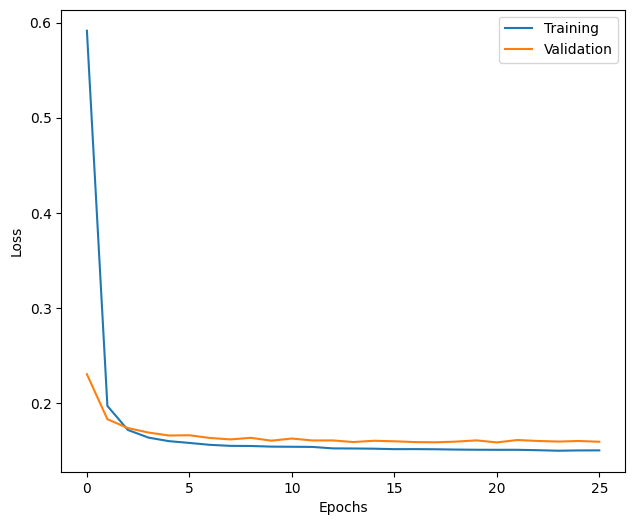

In [10]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

8/8 [==============================] - 0s 618us/step


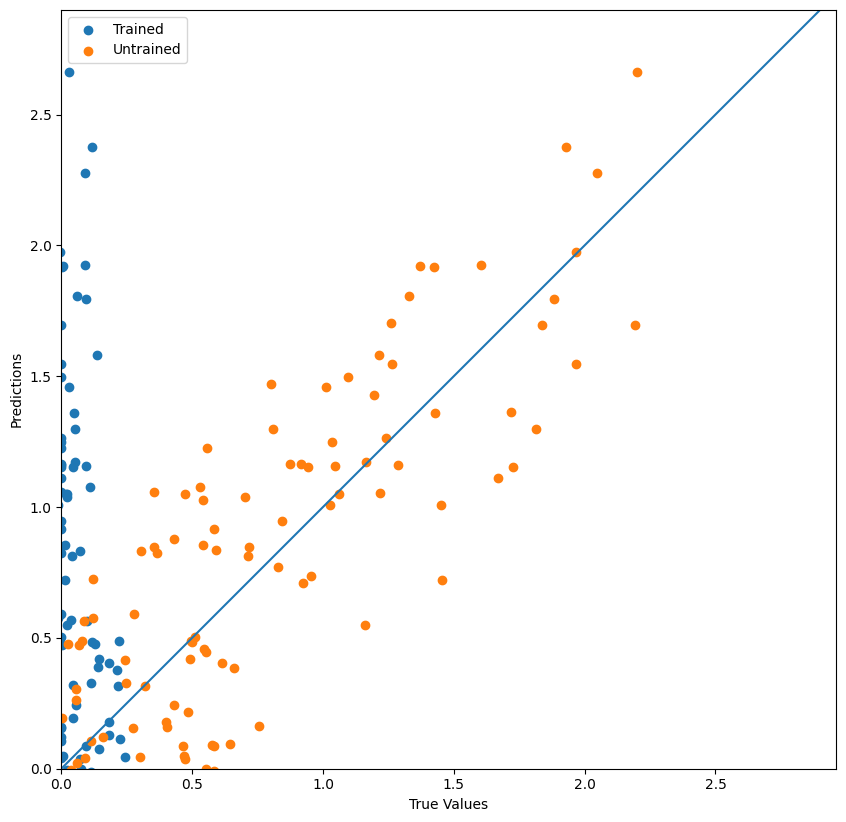

In [17]:
pt = model.predict(x_test)

def compare_predictions(pu,pt,y_test):
    plt.figure(figsize=(10,10))
    plt.scatter(pu,y_test)
    plt.scatter(pt,y_test)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])
    plt.legend(['Trained', 'Untrained'])
    plt.show()

compare_predictions(pu,pt,y_test)